## Начало лабораторной работы

In [2]:
import pandas as pd
df = pd.read_csv("..//static//csv//Medical_insurance.csv")
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [3]:
import pandas as pd
df = pd.read_csv("..//static//csv//Medical_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]

Создание лингвистических переменных

Входные X: age (возраст) и bmi (индекс массы тела)

Выходные Y: charges (расходы)

In [4]:
import numpy as np
from skfuzzy import control as ctrl

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

Формирование нечетких переменных для лингвистических переменных и их визуализация

c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


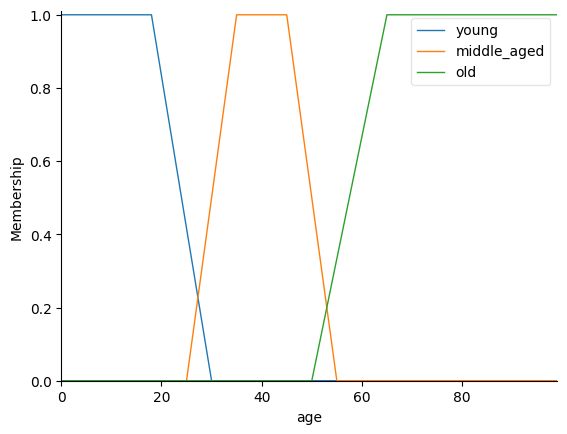

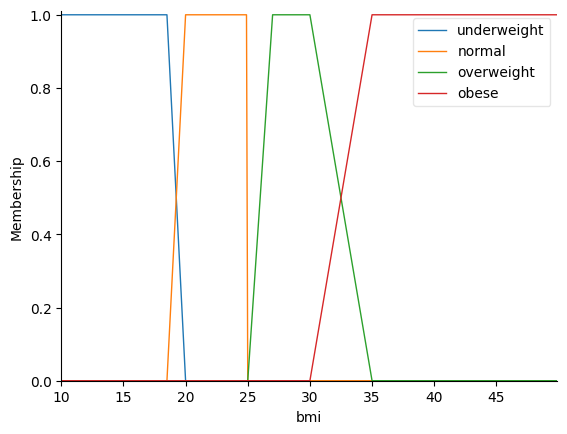

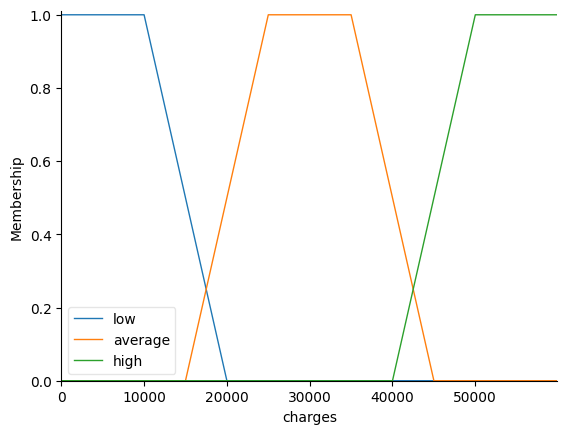

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

age["young"] = fuzz.trapmf(age.universe, [0, 0, 18, 30])
age["middle_aged"] = fuzz.trapmf(age.universe, [25, 35, 45, 55])
age["old"] = fuzz.trapmf(age.universe, [50, 65, 100, 100])
age.view()

bmi["underweight"] = fuzz.trapmf(bmi.universe, [10, 10, 18.5, 20])
bmi["normal"] = fuzz.trapmf(bmi.universe, [18.5, 20, 24.9, 25])
bmi["overweight"] = fuzz.trapmf(bmi.universe, [25, 27, 30, 35])
bmi["obese"] = fuzz.trapmf(bmi.universe, [30, 35, 50, 50])
bmi.view()

charges["low"] = fuzz.trapmf(charges.universe, [0, 0, 10000, 20000])
charges["average"] = fuzz.trapmf(charges.universe, [15000, 25000, 35000, 45000])
charges["high"] = fuzz.trapmf(charges.universe, [40000, 50000, 60000, 60000])
charges.view()

plt.show()

Формирование и визуализация базы нечетких правил

(<Figure size 640x480 with 1 Axes>, <Axes: >)

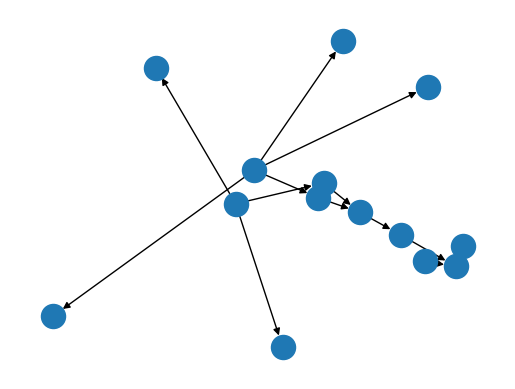

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

age["young"] = fuzz.trapmf(age.universe, [0, 0, 18, 30])
age["middle_aged"] = fuzz.trapmf(age.universe, [25, 35, 45, 55])
age["old"] = fuzz.trapmf(age.universe, [50, 65, 100, 100])

bmi["underweight"] = fuzz.trapmf(bmi.universe, [10, 10, 18.5, 20])
bmi["normal"] = fuzz.trapmf(bmi.universe, [18.5, 20, 24.9, 25])
bmi["overweight"] = fuzz.trapmf(bmi.universe, [25, 27, 30, 35])
bmi["obese"] = fuzz.trapmf(bmi.universe, [30, 35, 50, 50])

charges["low"] = fuzz.trapmf(charges.universe, [0, 0, 10000, 20000])
charges["average"] = fuzz.trapmf(charges.universe, [15000, 25000, 35000, 45000])
charges["high"] = fuzz.trapmf(charges.universe, [40000, 50000, 60000, 60000])

rules = []
rules.append(ctrl.Rule(age["young"] & bmi["underweight"], charges["low"]))
rules.append(ctrl.Rule(age["young"] & bmi["normal"], charges["average"]))
rules.append(ctrl.Rule(age["young"] & bmi["overweight"], charges["average"]))
rules.append(ctrl.Rule(age["young"] & bmi["obese"], charges["high"]))
rules.append(ctrl.Rule(age["middle_aged"] & bmi["underweight"], charges["low"]))
rules.append(ctrl.Rule(age["middle_aged"] & bmi["normal"], charges["average"]))
rules.append(ctrl.Rule(age["middle_aged"] & bmi["overweight"], charges["high"]))
rules.append(ctrl.Rule(age["middle_aged"] & bmi["obese"], charges["high"]))
rules.append(ctrl.Rule(age["old"] & bmi["underweight"], charges["average"]))
rules.append(ctrl.Rule(age["old"] & bmi["normal"], charges["high"]))
rules.append(ctrl.Rule(age["old"] & bmi["overweight"], charges["high"]))
rules.append(ctrl.Rule(age["old"] & bmi["obese"], charges["high"]))

charges_ctrl = ctrl.ControlSystem(rules)
charges_sim = ctrl.ControlSystemSimulation(charges_ctrl)

rule1 = ctrl.Rule(age["young"] & bmi["underweight"], charges["low"])
rule1.view()

Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы

<Figure size 640x480 with 0 Axes>

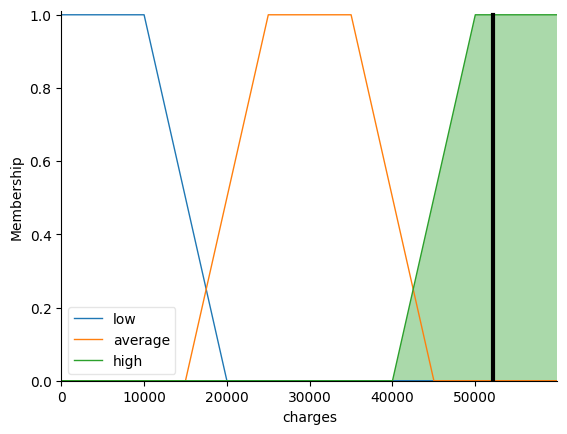

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Создание системы управления
charges_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
        rule10,
        rule11,
        rule12,
    ]
)

charges_sim = ctrl.ControlSystemSimulation(charges_ctrl)

charges_sim.input['age'] = 45  
charges_sim.input['bmi'] = 28   

charges_sim.compute()

plt.figure() 
charges.view(sim=charges_sim)

plt.show()

Пример расчета выходной переменной charges на основе входных переменных age и bmi

Система также формирует подробный журнал выполнения процесса нечеткого логического вывода

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

charges_sim.input['age'] = 45  
charges_sim.input['bmi'] = 28   

charges_sim.compute()

charges_sim.print_state()

result = charges_sim.output['charges']
print(f"Предполагаемые расходы: {result:.2f}")

 Antecedents 
Antecedent: age                     = 45
  - young                           : 0.0
  - middle_aged                     : 1.0
  - old                             : 0.0
Antecedent: bmi                     = 28
  - underweight                     : 0.0
  - normal                          : 0.0
  - overweight                      : 1.0
  - obese                           : 0.0

 Rules 
RULE #0:
  IF age[young] AND bmi[underweight] THEN charges[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - age[young]                                             : 0.0
  - bmi[underweight]                                       : 0.0
                           age[young] AND bmi[underweight] = 0.0
  Activation (THEN-clause):
                                              charges[low] : 0.0

RULE #1:
  IF age[young] AND bmi[normal] THEN charges[average]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause

In [ ]:
import pandas as pd

train_data = pd.read_csv("..//static//csv//Medical_insurance.csv", sep=",", decimal=",")
test_data = pd.read_csv("..//static//csv//Medical_insurance.csv", sep=",", decimal=",")

display(train_data.head(3))
display(test_data.head(3))

age     sex    bmi  children smoker     region    charges
0   19  female   27.9         0    yes  southwest  16884.924
1   18    male  33.77         1     no  southeast  1725.5523
2   28    male     33         3     no  southeast   4449.462

age     sex    bmi  children smoker     region    charges
0   19  female   27.9         0    yes  southwest  16884.924
1   18    male  33.77         1     no  southeast  1725.5523
2   28    male     33         3     no  southeast   4449.462

Инициализация лингвистических переменных и автоматическое формирование нечетких переменных

c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


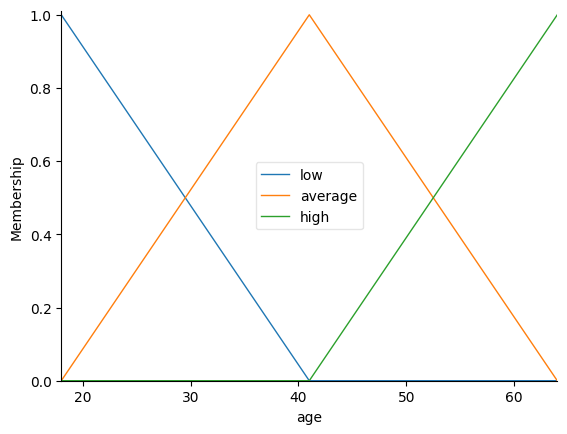

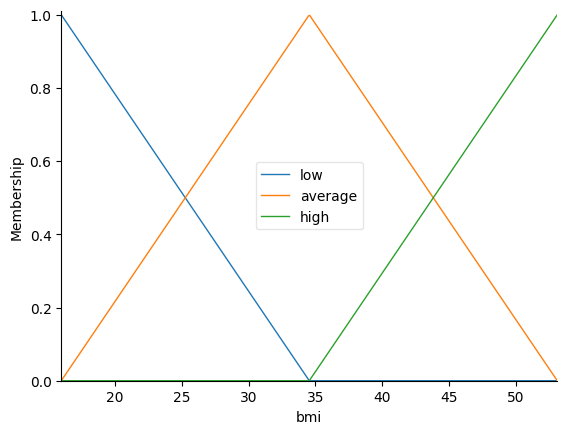

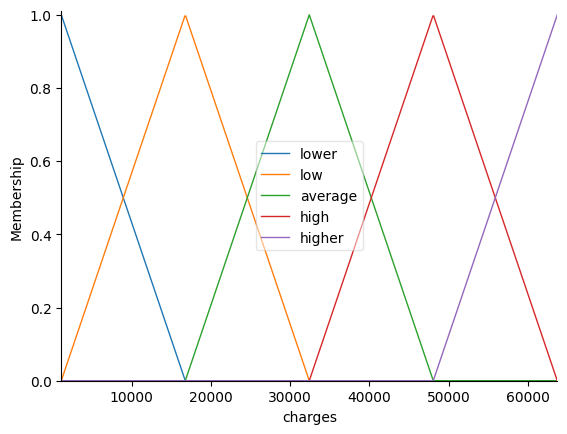

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

if 'age' in density_data.columns and 'bmi' in density_data.columns and 'charges' in density_data.columns:
    age = ctrl.Antecedent(density_data["age"].sort_values().unique(), "age")
    bmi = ctrl.Antecedent(density_data["bmi"].sort_values().unique(), "bmi")
    charges = ctrl.Consequent(np.arange(density_data["charges"].min(), density_data["charges"].max(), 100), "charges")

    age.automf(3, variable_type="quant")
    bmi.automf(3, variable_type="quant")
    charges.automf(5, variable_type="quant")

    age.view()
    bmi.view()
    charges.view()

    plt.show()

Нечеткие правила

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

age["young"] = fuzz.trapmf(age.universe, [0, 0, 18, 30])
age["middle_aged"] = fuzz.trapmf(age.universe, [25, 35, 45, 55])
age["old"] = fuzz.trapmf(age.universe, [50, 65, 100, 100])

bmi["underweight"] = fuzz.trapmf(bmi.universe, [10, 10, 18.5, 20])
bmi["normal"] = fuzz.trapmf(bmi.universe, [18.5, 20, 24.9, 25])
bmi["overweight"] = fuzz.trapmf(bmi.universe, [25, 27, 30, 35])
bmi["obese"] = fuzz.trapmf(bmi.universe, [30, 35, 50, 50])

charges["low"] = fuzz.trapmf(charges.universe, [0, 0, 10000, 20000])
charges["average"] = fuzz.trapmf(charges.universe, [15000, 25000, 35000, 45000])
charges["high"] = fuzz.trapmf(charges.universe, [40000, 50000, 60000, 60000])

rule1 = ctrl.Rule(
    age["young"] & bmi["underweight"],
    charges["low"],
)
rule2 = ctrl.Rule(
    age["young"] & bmi["normal"],
    charges["average"],
)
rule3 = ctrl.Rule(
    age["young"] & bmi["overweight"],
    charges["average"],
)
rule4 = ctrl.Rule(
    age["young"] & bmi["obese"],
    charges["high"],
)

rule5 = ctrl.Rule(
    age["middle_aged"] & bmi["underweight"],
    charges["average"],
)
rule6 = ctrl.Rule(
    age["middle_aged"] & bmi["normal"],
    charges["average"],
)
rule7 = ctrl.Rule(
    age["middle_aged"] & bmi["overweight"],
    charges["high"],
)
rule8 = ctrl.Rule(
    age["middle_aged"] & bmi["obese"],
    charges["high"],
)

rule9 = ctrl.Rule(
    age["old"] & bmi["underweight"],
    charges["high"],
)
rule10 = ctrl.Rule(
    age["old"] & bmi["normal"],
    charges["high"],
)
rule11 = ctrl.Rule(
    age["old"] & bmi["overweight"],
    charges["high"],
)
rule12 = ctrl.Rule(
    age["old"] & bmi["obese"],
    charges["high"],
)

Создание нечеткой системы

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

age = ctrl.Antecedent(np.arange(0, 100, 1), "age")
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), "bmi")
charges = ctrl.Consequent(np.arange(0, 60000, 100), "charges")

age["young"] = fuzz.trapmf(age.universe, [0, 0, 18, 30])
age["middle_aged"] = fuzz.trapmf(age.universe, [25, 35, 45, 55])
age["old"] = fuzz.trapmf(age.universe, [50, 65, 100, 100])

bmi["underweight"] = fuzz.trapmf(bmi.universe, [10, 10, 18.5, 20])
bmi["normal"] = fuzz.trapmf(bmi.universe, [18.5, 20, 24.9, 25])
bmi["overweight"] = fuzz.trapmf(bmi.universe, [25, 27, 30, 35])
bmi["obese"] = fuzz.trapmf(bmi.universe, [30, 35, 50, 50])

charges["low"] = fuzz.trapmf(charges.universe, [0, 0, 10000, 20000])
charges["average"] = fuzz.trapmf(charges.universe, [15000, 25000, 35000, 45000])
charges["high"] = fuzz.trapmf(charges.universe, [40000, 50000, 60000, 60000])

rule11 = ctrl.Rule(age["young"] & bmi["underweight"], charges["low"])
rule12 = ctrl.Rule(age["young"] & bmi["normal"], charges["average"])
rule13 = ctrl.Rule(age["young"] & bmi["overweight"], charges["average"])
rule21 = ctrl.Rule(age["young"] & bmi["obese"], charges["high"])

rule22 = ctrl.Rule(age["middle_aged"] & bmi["underweight"], charges["average"])
rule23 = ctrl.Rule(age["middle_aged"] & bmi["normal"], charges["average"])
rule31 = ctrl.Rule(age["middle_aged"] & bmi["overweight"], charges["high"])
rule32 = ctrl.Rule(age["middle_aged"] & bmi["obese"], charges["high"])

rule41 = ctrl.Rule(age["old"] & bmi["underweight"], charges["high"])
rule42 = ctrl.Rule(age["old"] & bmi["normal"], charges["high"])
rule43 = ctrl.Rule(age["old"] & bmi["overweight"], charges["high"])
rule51 = ctrl.Rule(age["old"] & bmi["obese"], charges["high"])

fuzzy_rules = [
    rule11,
    rule12,
    rule13,
    rule21,
    rule22,
    rule23,
    rule31,
    rule32,
    rule41,
    rule42,
    rule43,
    rule51,
]

density_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(density_cntrl)

fuzzy_rules

[IF age[young] AND bmi[underweight] THEN charges[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[young] AND bmi[normal] THEN charges[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[young] AND bmi[overweight] THEN charges[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[young] AND bmi[obese] THEN charges[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[middle_aged] AND bmi[underweight] THEN charges[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[middle_aged] AND bmi[normal] THEN charges[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[middle_aged] AND bmi[overweight] THEN charges[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF age[middle_aged] AND bmi[obese] THEN charges[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fma

Пример использования полученной нечеткой системы

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

sim.input["age"] = 25  
sim.input["bmi"] = 22  
sim.compute()          

sim.print_state()

result = sim.output["charges"]
print(f"Estimated Charges: {result}")

 Antecedents 
Antecedent: age                     = 25
  - young                           : 0.4166666666666667
  - middle_aged                     : 0.0
  - old                             : 0.0
Antecedent: bmi                     = 22
  - underweight                     : 0.0
  - normal                          : 1.0
  - overweight                      : 0.0
  - obese                           : 0.0

 Rules 
RULE #0:
  IF age[young] AND bmi[underweight] THEN charges[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - age[young]                                             : 0.4166666666666667
  - bmi[underweight]                                       : 0.0
                           age[young] AND bmi[underweight] = 0.0
  Activation (THEN-clause):
                                              charges[low] : 0.0

RULE #1:
  IF age[young] AND bmi[normal] THEN charges[average]
	AND aggregation function : fmin
	OR aggregation function  : 

Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X

In [ ]:
def fuzzy_pred(row):

    sim.input["age"] = row["age"]  
    sim.input["bmi"] = row["bmi"]   
    
    sim.compute()
    
    return sim.output["charges"]

import pandas as pd

data = {
    "age": [25, 40, 60],  
    "bmi": [22, 28, 32]   
}

df = pd.DataFrame(data)

df["predicted_charges"] = df.apply(fuzzy_pred, axis=1)

print(df)

   age  bmi  predicted_charges
0   25   22       30000.000000
1   40   28       52170.357942
2   60   32       51361.242604


Оценка результатов на основе метрик для задачи регрессии

In [ ]:
import numpy as np
import pandas as pd

data_train = {
    'Density': [1.0, 2.0, 3.0, 4.0, 5.0],  
    'DensityPred': [1.1, 1.9, 2.5, 3.5, 5.2]  
}

data_test = {
    'Density': [1.5, 2.5, 3.5, 4.5, 5.5],  
    'DensityPred': [1.6, 2.4, 3.6, 4.2, 5.7] 
}

result_train = pd.DataFrame(data_train)
result_test = pd.DataFrame(data_test)

rmetrics = {}
rmetrics["RMSE_train"] = np.sqrt(((result_train["Density"] - result_train["DensityPred"]) ** 2).mean())
rmetrics["RMSE_test"] = np.sqrt(((result_test["Density"] - result_test["DensityPred"]) ** 2).mean())

rmetrics["RMAE_test"] = (result_test["Density"] - result_test["DensityPred"]).abs().mean()

ss_res = ((result_test["Density"] - result_test["DensityPred"]) ** 2).sum()
ss_tot = ((result_test["Density"] - result_test["Density"].mean()) ** 2).sum()
rmetrics["R2_test"] = 1 - (ss_res / ss_tot)

print(rmetrics)

{'RMSE_train': np.float64(0.33466401061363027), 'RMSE_test': np.float64(0.1788854381999832), 'RMAE_test': np.float64(0.16000000000000006), 'R2_test': np.float64(0.984)}
